This based off of the tutorial from scanpy using pbmc 3K.
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

And heavily influenced by https://github.com/theislab/scanpy_usage/blob/master/170503_zheng17/zheng17.ipynb

We are interesting in doing 1month vs 30month, male kidney

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context

import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.23.5 scipy==1.8.1 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


## Open files

In [2]:
data_path = f"{os.getcwd()}/../../data/single_cell_data/kidney_aging/"

# file downloaded from SeuratData then converted to h5ad 

in_file = f"{data_path}/Kidney_droplet.h5ad"
results_file = f"{data_path}/kidney_droplet_processed.h5ad"

adata = sc.read_h5ad(in_file)
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`



/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [3]:
adata.var

n_cells     means  dispersions  dispersions_norm  \
index                                                            
Xkr4              147  0.000620     0.602055         -0.377609   
Rp1               231  0.001113     0.714446         -0.210207   
Sox17           27266  0.321474     2.673646          1.738699   
Mrpl15          95249  0.441935     0.557784         -0.621031   
Lypla1          86035  0.403077     0.681064         -0.483542   
...               ...       ...          ...               ...   
LOC434960           5  0.000020     0.538321         -0.472538   
LOC380994          32  0.000153     0.581528         -0.408182   
LOC100041346       19  0.000066     0.675712         -0.267900   
Sly                 9  0.000038     0.486892         -0.549140   
Erdr1           82853  0.467227     1.085469         -0.032526   

              highly_variable  
index                          
Xkr4                    False  
Rp1                     False  
Sox17                    True  
Mrpl15                  False  
Lypla1                  False  
...                       ...  
LOC434960               False  
LOC380994               False  
LOC100041346            False  
Sly                     False  
Erdr1                   False  

[19860 rows x 5 columns]

In [4]:
adata.obs

age batch                                   cell  \
index                                                                           
AAACCTGGTGCTTCTC-1-7-0-0     18m     0  MACA_18m_F_KIDNEY_50_AAACCTGGTGCTTCTC   
AAACCTGTCCGCAAGC-1-7-0-0     18m     0  MACA_18m_F_KIDNEY_50_AAACCTGTCCGCAAGC   
AAACGGGAGGCTATCT-1-7-0-0     18m     0  MACA_18m_F_KIDNEY_50_AAACGGGAGGCTATCT   
AAACGGGGTACAGTGG-1-7-0-0     18m     0  MACA_18m_F_KIDNEY_50_AAACGGGGTACAGTGG   
AAACGGGGTGATAAAC-1-7-0-0     18m     0  MACA_18m_F_KIDNEY_50_AAACGGGGTGATAAAC   
...                          ...   ...                                    ...   
10X_P7_5_TTTGGTTTCTCGTATT-1   3m     1              10X_P7_5_TTTGGTTTCTCGTATT   
10X_P7_5_TTTGTCAAGGCATTGG-1   3m     1              10X_P7_5_TTTGTCAAGGCATTGG   
10X_P7_5_TTTGTCACACGCCAGT-1   3m     1              10X_P7_5_TTTGTCACACGCCAGT   
10X_P7_5_TTTGTCACATGGATGG-1   3m     1              10X_P7_5_TTTGTCACATGGATGG   
10X_P7_5_TTTGTCAGTCCGACGT-1   3m     1              10X_P7_5_TTTGTCAGTCCGACGT   

                                                           cell_ontology_class  \
index                                                                            
AAACCTGGTGCTTCTC-1-7-0-0     kidney proximal convoluted tubule epithelial cell   
AAACCTGTCCGCAAGC-1-7-0-0     kidney proximal convoluted tubule epithelial cell   
AAACGGGAGGCTATCT-1-7-0-0                                            macrophage   
AAACGGGGTACAGTGG-1-7-0-0                                                B cell   
AAACGGGGTGATAAAC-1-7-0-0     kidney proximal convoluted tubule epithelial cell   
...                                                                        ...   
10X_P7_5_TTTGGTTTCTCGTATT-1                                         macrophage   
10X_P7_5_TTTGTCAAGGCATTGG-1  kidney loop of Henle thick ascending limb epit...   
10X_P7_5_TTTGTCACACGCCAGT-1    kidney distal convoluted tubule epithelial cell   
10X_P7_5_TTTGTCACATGGATGG-1  kidney proximal convoluted tubule epithelial cell   
10X_P7_5_TTTGTCAGTCCGACGT-1  kidney proximal convoluted tubule epithelial cell   

                            cell_ontology_id  \
index                                          
AAACCTGGTGCTTCTC-1-7-0-0          CL:1000838   
AAACCTGTCCGCAAGC-1-7-0-0          CL:1000838   
AAACGGGAGGCTATCT-1-7-0-0          CL:0000235   
AAACGGGGTACAGTGG-1-7-0-0          CL:0000236   
AAACGGGGTGATAAAC-1-7-0-0          CL:1000838   
...                                      ...   
10X_P7_5_TTTGGTTTCTCGTATT-1       CL:0000235   
10X_P7_5_TTTGTCAAGGCATTGG-1       CL:1001106   
10X_P7_5_TTTGTCACACGCCAGT-1       CL:1000849   
10X_P7_5_TTTGTCACATGGATGG-1       CL:1000838   
10X_P7_5_TTTGTCAGTCCGACGT-1       CL:1000838   

                                                               free_annotation  \
index                                                                            
AAACCTGGTGCTTCTC-1-7-0-0     Epcam    kidney proximal convoluted tubule epi...   
AAACCTGTCCGCAAGC-1-7-0-0     Epcam    kidney proximal convoluted tubule epi...   
AAACGGGAGGCTATCT-1-7-0-0                                    CD45    macrophage   
AAACGGGGTACAGTGG-1-7-0-0                                        CD45    B cell   
AAACGGGGTGATAAAC-1-7-0-0     Epcam    kidney proximal convoluted tubule epi...   
...                                                                        ...   
10X_P7_5_TTTGGTTTCTCGTATT-1                                 CD45    macrophage   
10X_P7_5_TTTGTCAAGGCATTGG-1    Epcam    thick ascending tube S epithelial cell   
10X_P7_5_TTTGTCACACGCCAGT-1  Epcam     kidney distal convoluted tubule epit...   
10X_P7_5_TTTGTCACATGGATGG-1  Epcam    kidney proximal convoluted tubule epi...   
10X_P7_5_TTTGTCAGTCCGACGT-1  Epcam    kidney proximal convoluted tubule epi...   

                              method mouse.id  n_genes     sex subtissue  \
index                                                                      
AAACCTGGTGCTTCTC-1-7-0-0     droplet  18-F-50     1612  female  

In [5]:
# how many of each mouse
adata.obs["mouse.id"].value_counts()

24-M-59    2392
24-M-58    2261
30-M-2     1734
30-M-3     1277
30-M-4     1225
1-M-62     1163
18-F-51    1116
21-F-54    1075
1-M-63     1054
18-M-52    1028
3-F-57     1020
21-F-55     997
30-M-5      935
18-F-50     744
3-M-9       595
3-M-8       485
Name: mouse.id, dtype: int64

## check number of cells per sample of interest

In [6]:
# how many of each cell
adata.obs.cell_ontology_class.value_counts()

kidney proximal convoluted tubule epithelial cell            4449
epithelial cell of proximal tubule                           2516
B cell                                                       2495
kidney loop of Henle thick ascending limb epithelial cell    1588
macrophage                                                   1319
lymphocyte                                                   1289
T cell                                                       1139
fenestrated cell                                              860
kidney collecting duct principal cell                         748
kidney distal convoluted tubule epithelial cell               662
podocyte                                                      487
kidney cortex artery cell                                     428
brush cell                                                    347
plasma cell                                                   232
kidney mesangial cell                                         178
fibroblast

In [7]:
# how many in 1m
adata.obs.iloc[np.where(adata.obs["mouse.id"] == "1-M-63")].cell_ontology_class.value_counts()

kidney proximal convoluted tubule epithelial cell            427
kidney loop of Henle thick ascending limb epithelial cell    229
fenestrated cell                                              81
podocyte                                                      41
kidney mesangial cell                                         40
kidney cortex artery cell                                     39
kidney distal convoluted tubule epithelial cell               36
kidney collecting duct principal cell                         34
macrophage                                                    34
kidney capillary endothelial cell                             31
brush cell                                                    26
epithelial cell of proximal tubule                            15
fibroblast                                                     8
lymphocyte                                                     5
T cell                                                         4
B cell                   

In [8]:
adata.obs.iloc[np.where(adata.obs["mouse.id"] == "1-M-62")].cell_ontology_class.value_counts()

kidney proximal convoluted tubule epithelial cell            522
kidney loop of Henle thick ascending limb epithelial cell    241
fenestrated cell                                              85
podocyte                                                      51
kidney collecting duct principal cell                         43
kidney distal convoluted tubule epithelial cell               43
kidney mesangial cell                                         40
kidney cortex artery cell                                     36
brush cell                                                    27
macrophage                                                    25
kidney capillary endothelial cell                             18
epithelial cell of proximal tubule                            11
fibroblast                                                     7
lymphocyte                                                     6
T cell                                                         4
B cell                   

In [9]:
adata.obs.iloc[np.where(adata.obs["mouse.id"] == "30-M-2")].cell_ontology_class.value_counts()

epithelial cell of proximal tubule                           799
macrophage                                                   180
kidney loop of Henle thick ascending limb epithelial cell    145
kidney proximal convoluted tubule epithelial cell            137
kidney collecting duct principal cell                        117
podocyte                                                      73
fenestrated cell                                              62
fibroblast                                                    53
kidney cortex artery cell                                     42
kidney distal convoluted tubule epithelial cell               40
T cell                                                        31
lymphocyte                                                    21
brush cell                                                    16
B cell                                                         8
kidney capillary endothelial cell                              6
kidney mesangial cell    

In [10]:
adata.obs.iloc[np.where(adata.obs["mouse.id"] == "30-M-3")].cell_ontology_class.value_counts()

epithelial cell of proximal tubule                           398
kidney proximal convoluted tubule epithelial cell            224
macrophage                                                   148
kidney collecting duct principal cell                         94
T cell                                                        89
kidney loop of Henle thick ascending limb epithelial cell     68
fenestrated cell                                              51
podocyte                                                      49
kidney distal convoluted tubule epithelial cell               43
kidney cortex artery cell                                     34
lymphocyte                                                    28
B cell                                                        19
fibroblast                                                    15
plasma cell                                                   12
kidney mesangial cell                                          4
NK cell                  

In [11]:
adata.obs.iloc[np.where(adata.obs["mouse.id"] == "30-M-4")].cell_ontology_class.value_counts()

epithelial cell of proximal tubule                           439
kidney proximal convoluted tubule epithelial cell            269
macrophage                                                   125
kidney collecting duct principal cell                         72
fenestrated cell                                              68
kidney loop of Henle thick ascending limb epithelial cell     47
lymphocyte                                                    39
T cell                                                        36
kidney distal convoluted tubule epithelial cell               27
podocyte                                                      25
plasma cell                                                   23
B cell                                                        21
kidney cortex artery cell                                     16
fibroblast                                                     8
brush cell                                                     8
NK cell                  

In [12]:
adata.obs.iloc[np.where(adata.obs["mouse.id"] == "30-M-5")].cell_ontology_class.value_counts()

epithelial cell of proximal tubule                           356
kidney proximal convoluted tubule epithelial cell            190
kidney collecting duct principal cell                         88
kidney loop of Henle thick ascending limb epithelial cell     65
macrophage                                                    61
fenestrated cell                                              33
podocyte                                                      24
kidney distal convoluted tubule epithelial cell               23
kidney cortex artery cell                                     23
T cell                                                        21
lymphocyte                                                    18
B cell                                                        14
brush cell                                                     7
plasma cell                                                    6
fibroblast                                                     4
NK cell                  

In [13]:
# select only the 30 and 1month male samples

adata.obs["keep"] = ["no"]*adata.n_obs
adata.obs.keep.iloc[np.where(adata.obs["mouse.id"] == "30-M-5")] = "yes"
adata.obs.keep.iloc[np.where(adata.obs["mouse.id"] == "30-M-4")] = "yes"
adata.obs.keep.iloc[np.where(adata.obs["mouse.id"] == "30-M-3")] = "yes"
adata.obs.keep.iloc[np.where(adata.obs["mouse.id"] == "30-M-2")] = "yes"
adata.obs.keep.iloc[np.where(adata.obs["mouse.id"] == "1-M-63")] = "yes"
adata.obs.keep.iloc[np.where(adata.obs["mouse.id"] == "1-M-62")] = "yes"

# combine two samples to make enough cell types
adata.obs["mouse.id"].iloc[np.where(adata.obs["mouse.id"] == "30-M-3")] = "30-M-4"
adata.obs.keep.iloc[np.where(adata.obs["mouse.id"] == "30-M-3")] = "no"



<ipython-input-13-27d268e7360d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.keep.iloc[np.where(adata.obs["mouse.id"] == "30-M-5")] = "yes"
<ipython-input-13-27d268e7360d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.keep.iloc[np.where(adata.obs["mouse.id"] == "30-M-4")] = "yes"
<ipython-input-13-27d268e7360d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.keep.iloc[np.where(adata.obs["mouse.id"]

In [14]:
# make sure we have the correct number of cells remaining

adata.obs.keep.value_counts()

no     11713
yes     7388
Name: keep, dtype: int64

In [15]:
# subset
adata = adata[np.where(adata.obs["keep"] == "yes")]


## Preprocessing

In [16]:
# we are going to combine a few cell types
tab = adata.obs.groupby(['mouse.id', 'cell_ontology_class']).size()

tab.unstack()

cell_ontology_class  B cell  NK cell  T cell  brush cell  \
mouse.id                                                   
1-M-62                    4        0       4          27   
1-M-63                    3        1       4          26   
30-M-2                    8        1      31          16   
30-M-4                   40        2     125           8   
30-M-5                   14        1      21           7   

cell_ontology_class  epithelial cell of proximal tubule  fenestrated cell  \
mouse.id                                                                    
1-M-62                                               11                85   
1-M-63                                               15                81   
30-M-2                                              799                62   
30-M-4                                              837               119   
30-M-5                                              356                33   

cell_ontology_class  fibroblast  kidney capillary endothelial cell  \
mouse.id                                                             
1-M-62                        7                                 18   
1-M-63                        8                                 31   
30-M-2                       53                                  6   
30-M-4                       23                                  1   
30-M-5                        4                                  0   

cell_ontology_class  kidney collecting duct principal cell  \
mouse.id                                                     
1-M-62                                                  43   
1-M-63                                                  34   
30-M-2                                                 117   
30-M-4                                                 166   
30-M-5                                                  88   

cell_ontology_class  kidney cortex artery cell  \
mouse.id                                         
1-M-62                                      36   
1-M-63                                      39   
30-M-2                                      42   
30-M-4                                      50   
30-M-5                                      23   

cell_ontology_class  kidney distal convoluted tubule epithelial cell  \
mouse.id                                                               
1-M-62                                                            43   
1-M-63                                                            36   
30-M-2                                                            40   
30-M-4                                                            70   
30-M-5                                                            23   

cell_ontology_class  kidney loop of Henle thick ascending limb epithelial cell  \
mouse.id                                                                         
1-M-62                                                             241           
1-M-63                                                             229           
30-M-2                                                             145           
30-M-4                                                             115           
30-M-5                                                              65           

cell_ontology_class  kidney mesangial cell  \
mouse.id                                     
1-M-62                                  40   
1-M-63                                  40   
30-M-2                                   2   
30-M-4                                   4   
30-M-5                                   1   

cell_ontology_class  kidney proximal convoluted tubule epithelial cell  \
mouse.id                                                                 
1-M-62                                                             522   
1-M-63                                                             427   
30-M-2                                                         

In [17]:
# merge them
cell_dict = {'T_NK_plasma': ["NK cell", "T cell", "plasma cell"],
             'b_cell': ["B cell"],
             'lymphocyte': ["lymphocyte"],
             'brush': ["brush cell"], 
             'epithelial_proximal_tubule': ["epithelial cell of proximal tubule"], 
             'kidney_proximal_convoluted_tubule_epithelial': ["kidney proximal convoluted tubule epithelial cell"], 
             'fenestrated_capillary': ["fenestrated cell", "kidney capillary endothelial cell"],
             'kidney_cortex_artery_cell': ["kidney cortex artery cell"],
             'fibroblast': ["fibroblast"], 
             'mesangial': ["kidney mesangial cell"], 
             'kidney_collecting_duct_principal_cell': ["kidney collecting duct principal cell"],
             'kidney_distal_convoluted_tubule_epithelial_cell':["kidney distal convoluted tubule epithelial cell"],
             'kidney_loop_of_Henle_thick_ascending_limb_epithelial_cell': ["kidney loop of Henle thick ascending limb epithelial cell"],
             'macrophage': ["macrophage"],
             'podocyte': ["podocyte"]}

# Initialize empty column in cell metadata
adata.obs['names_merged'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.cell_ontology_class).isin(cell_dict[i])
    adata.obs.loc[ind,'names_merged'] = i

adata.obs.names_merged.value_counts()

<ipython-input-17-a571e216a640>:19: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['names_merged'] = np.nan


epithelial_proximal_tubule                                   2018
kidney_proximal_convoluted_tubule_epithelial                 1769
kidney_loop_of_Henle_thick_ascending_limb_epithelial_cell     795
macrophage                                                    573
kidney_collecting_duct_principal_cell                         448
fenestrated_capillary                                         436
podocyte                                                      263
T_NK_plasma                                                   232
kidney_distal_convoluted_tubule_epithelial_cell               212
kidney_cortex_artery_cell                                     190
lymphocyte                                                    117
fibroblast                                                     95
mesangial                                                      87
brush                                                          84
b_cell                                                         69
Name: name

In [18]:
# we are going to combine a few cell types
tab = adata.obs.groupby(['mouse.id', 'names_merged']).size()

tab.unstack()

names_merged  T_NK_plasma  b_cell  brush  epithelial_proximal_tubule  \
mouse.id                                                               
1-M-62                  4       4     27                          11   
1-M-63                  5       3     26                          15   
30-M-2                 33       8     16                         799   
30-M-4                162      40      8                         837   
30-M-5                 28      14      7                         356   

names_merged  fenestrated_capillary  fibroblast  \
mouse.id                                          
1-M-62                          103           7   
1-M-63                          112           8   
30-M-2                           68          53   
30-M-4                          120          23   
30-M-5                           33           4   

names_merged  kidney_collecting_duct_principal_cell  \
mouse.id                                              
1-M-62                                           43   
1-M-63                                           34   
30-M-2                                          117   
30-M-4                                          166   
30-M-5                                           88   

names_merged  kidney_cortex_artery_cell  \
mouse.id                                  
1-M-62                               36   
1-M-63                               39   
30-M-2                               42   
30-M-4                               50   
30-M-5                               23   

names_merged  kidney_distal_convoluted_tubule_epithelial_cell  \
mouse.id                                                        
1-M-62                                                     43   
1-M-63                                                     36   
30-M-2                                                     40   
30-M-4                                                     70   
30-M-5                                                     23   

names_merged  kidney_loop_of_Henle_thick_ascending_limb_epithelial_cell  \
mouse.id                                                                  
1-M-62                                                      241           
1-M-63                                                      229           
30-M-2                                                      145           
30-M-4                                                      115           
30-M-5                                                       65           

names_merged  kidney_proximal_convoluted_tubule_epithelial  lymphocyte  \
mouse.id                                                                 
1-M-62                                                 522           6   
1-M-63                                                 427           5   
30-M-2                                                 137          21   
30-M-4                                                 493          67   
30-M-5                                                 190          18   

names_merged  macrophage  mesangial  podocyte  
mouse.id                                       
1-M-62                25         40        51  
1-M-63                34         40        41  
30-M-2               180          2        73  
30-M-4               273          4        74  
30-M-5                61          1        24

normalizing counts per cell
    finished (0:00:00)


/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


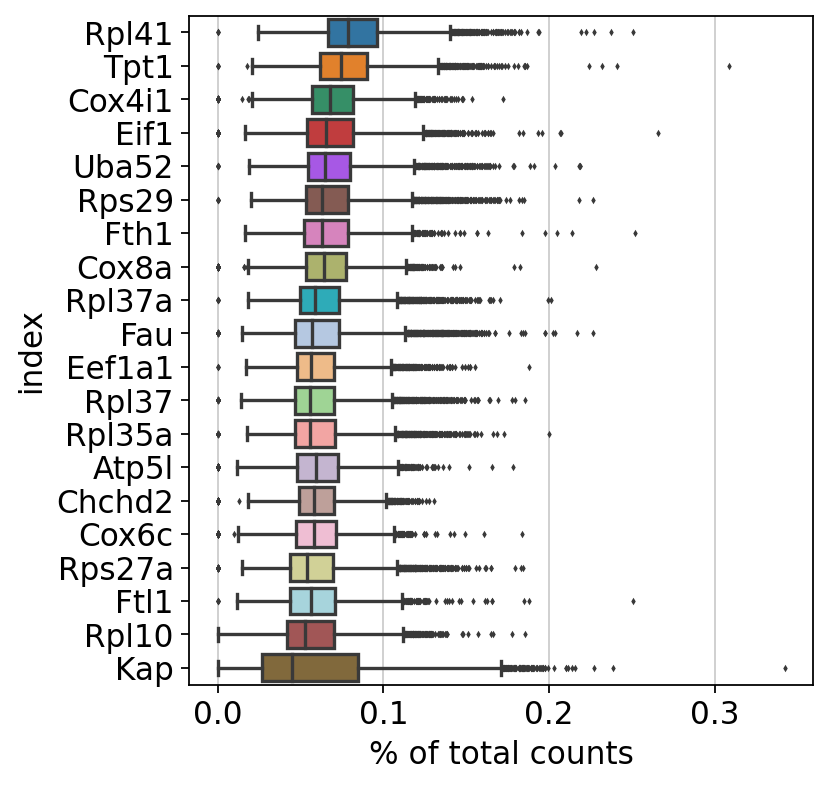

In [19]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [20]:
# filter out cells with less than 200 genes and genes expressed in less than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


filtered out 3070 genes that are detected in less than 3 cells


In [21]:
adata.var_names[np.where(adata.var_names.str.startswith('MT'))]

Index([], dtype='object', name='index')

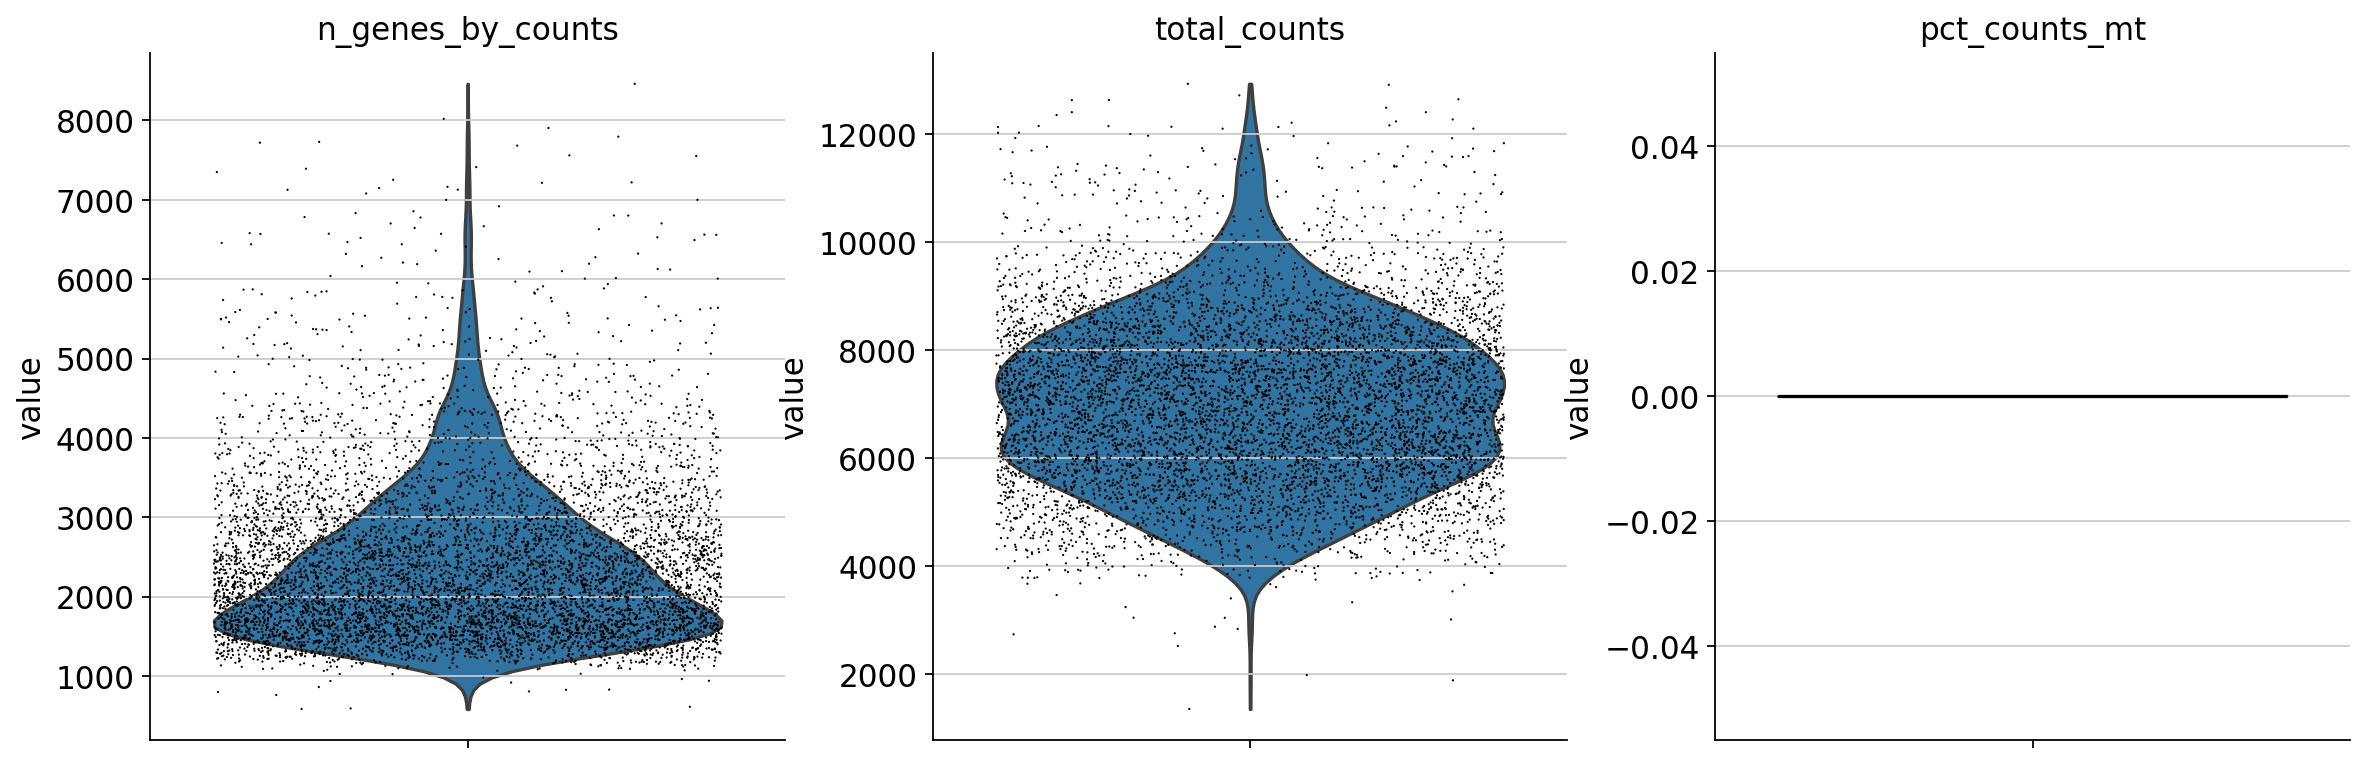

In [22]:
# remove genes with high mitochondrial content
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

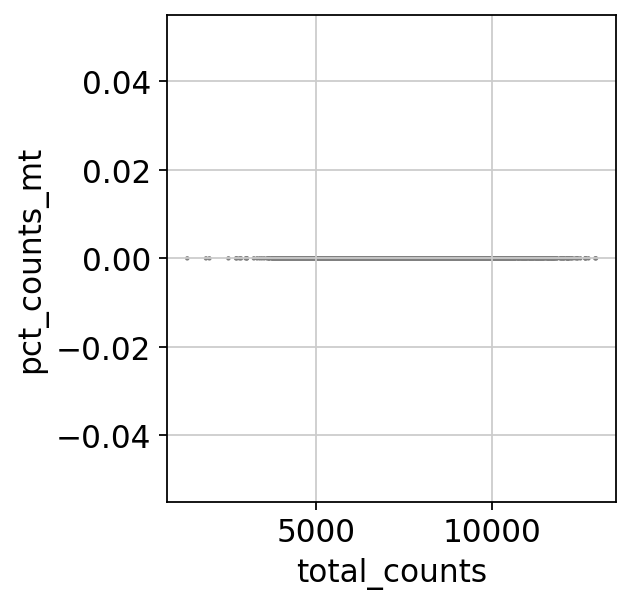

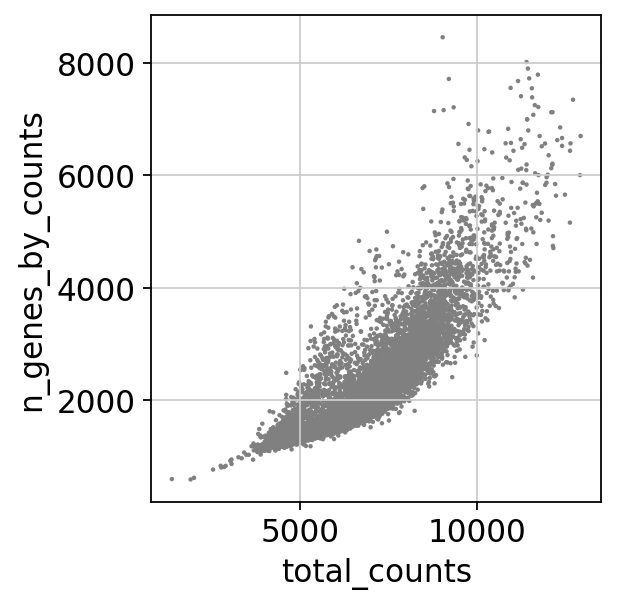

In [23]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [24]:
# slice the data based on the plots from above
# remove cells with more than 9000 genes
# remove cells with more than 5% MTgenes
# we aren't removing anything
adata = adata[adata.obs.n_genes_by_counts < 9000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [25]:
results_file

'/beevol/home/davidson/checkouts/sc_bulk_ood/sc_preprocessing/0_qc_notebooks/../../data/single_cell_data/kidney_aging//kidney_droplet_processed.h5ad'

In [26]:
# write it out before normalization
adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
del adata.raw
adata.write(results_file)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


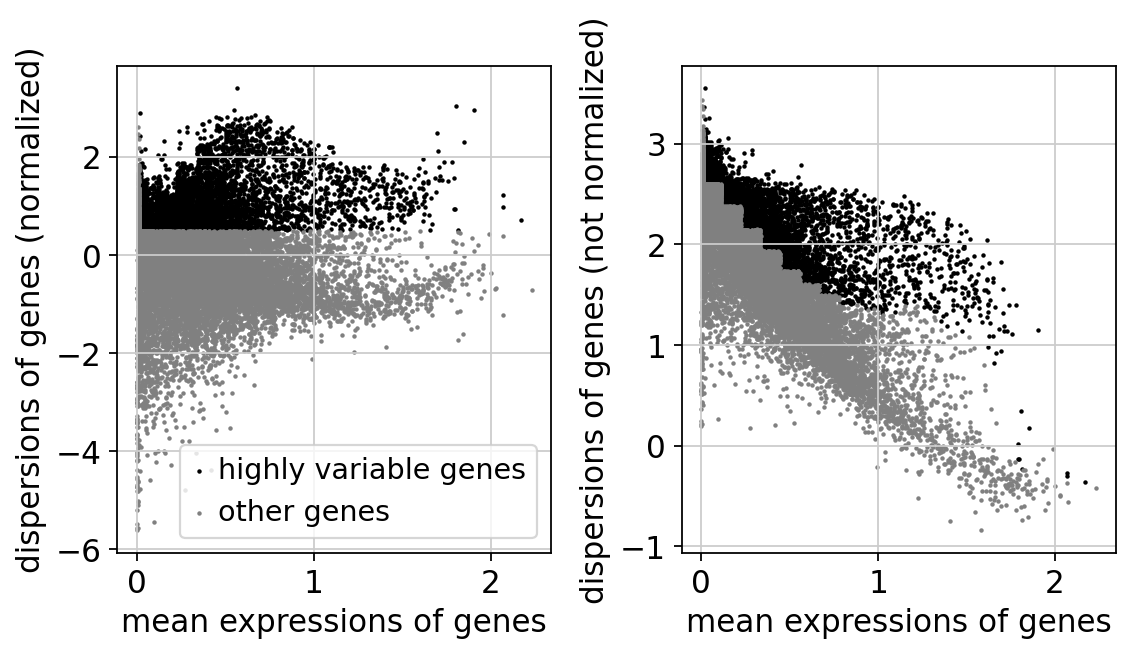

In [27]:
# normalize to 10K counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)

# log data
sc.pp.log1p(adata)

# get high variance genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# and plot
sc.pl.highly_variable_genes(adata)

# now store the raw version of the data for our use later
adata.raw = adata


In [28]:
# now process the counts further for doing DE 
# analysis and the cell clustering
adata = adata[:, adata.var.highly_variable]

# regress out the signal
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

# scale the genes
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:57)


## PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)


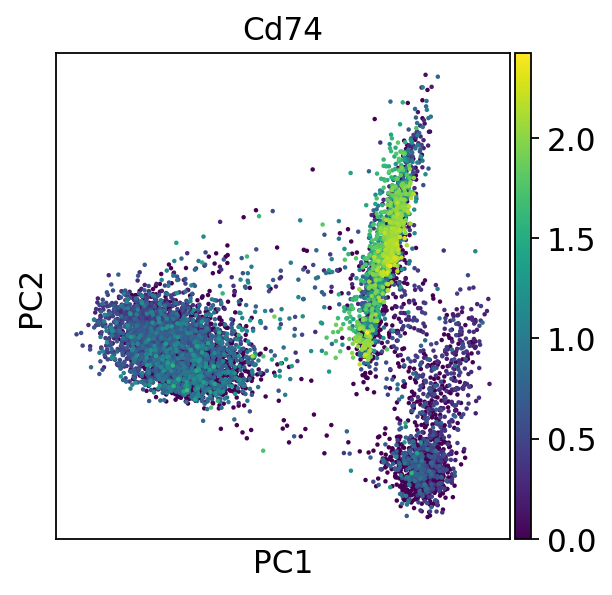

In [29]:
sc.tl.pca(adata, n_comps=50)
sc.pl.pca(adata, color='Cd74')


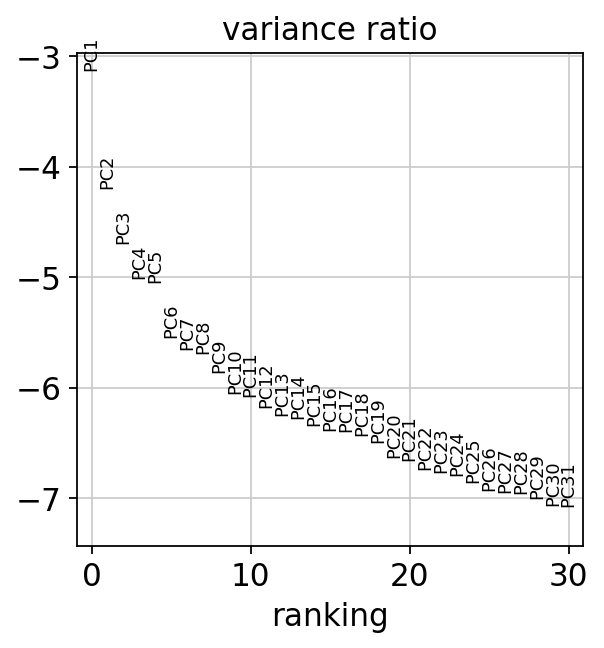

In [30]:
sc.pl.pca_variance_ratio(adata, log=True)


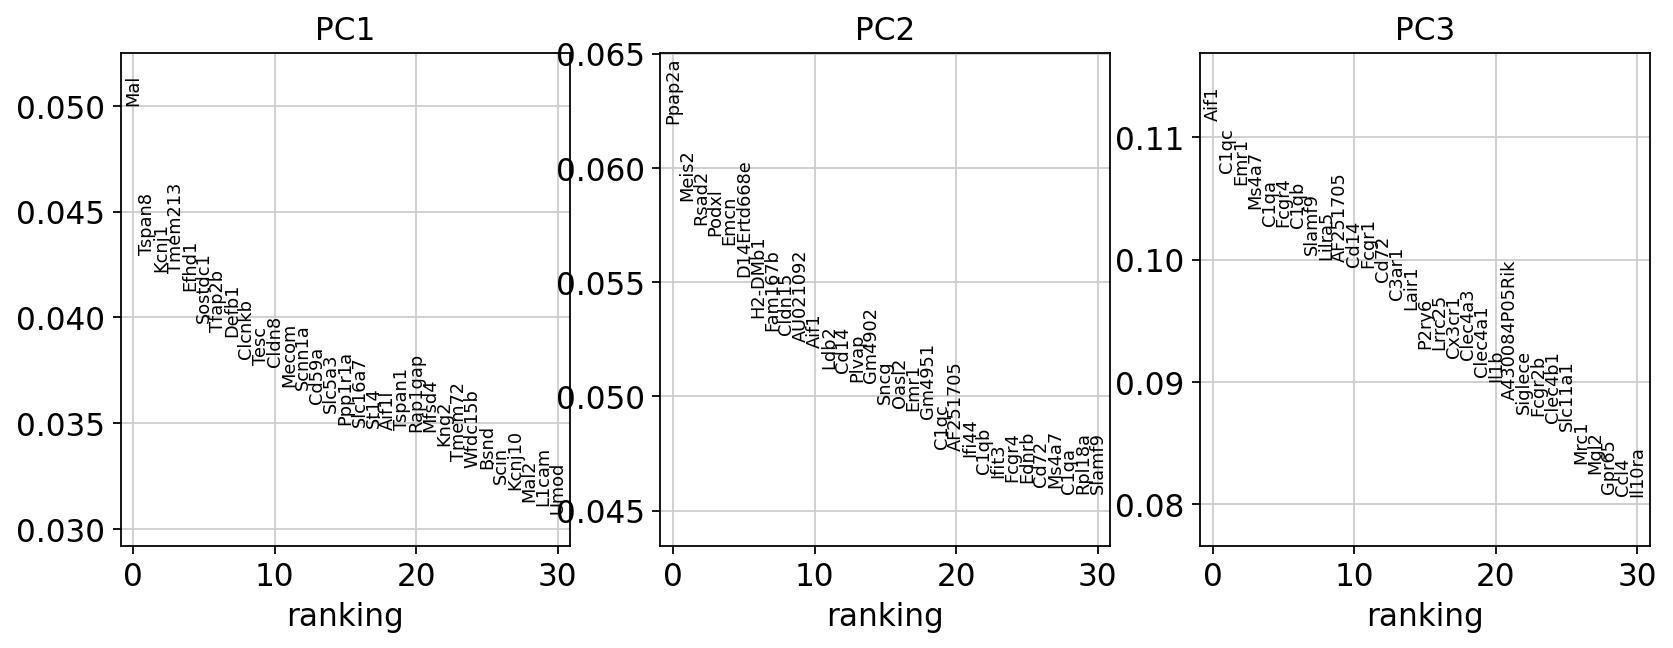

In [31]:
sc.pl.pca_loadings(adata, include_lowest=False)


## Compute and embed neighborhood graph

In [32]:
# valculate neighborhood graph
sc.pp.neighbors(adata)

# make umap
sc.tl.umap(adata)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:22)


## Cluster the neighborhood graph

running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


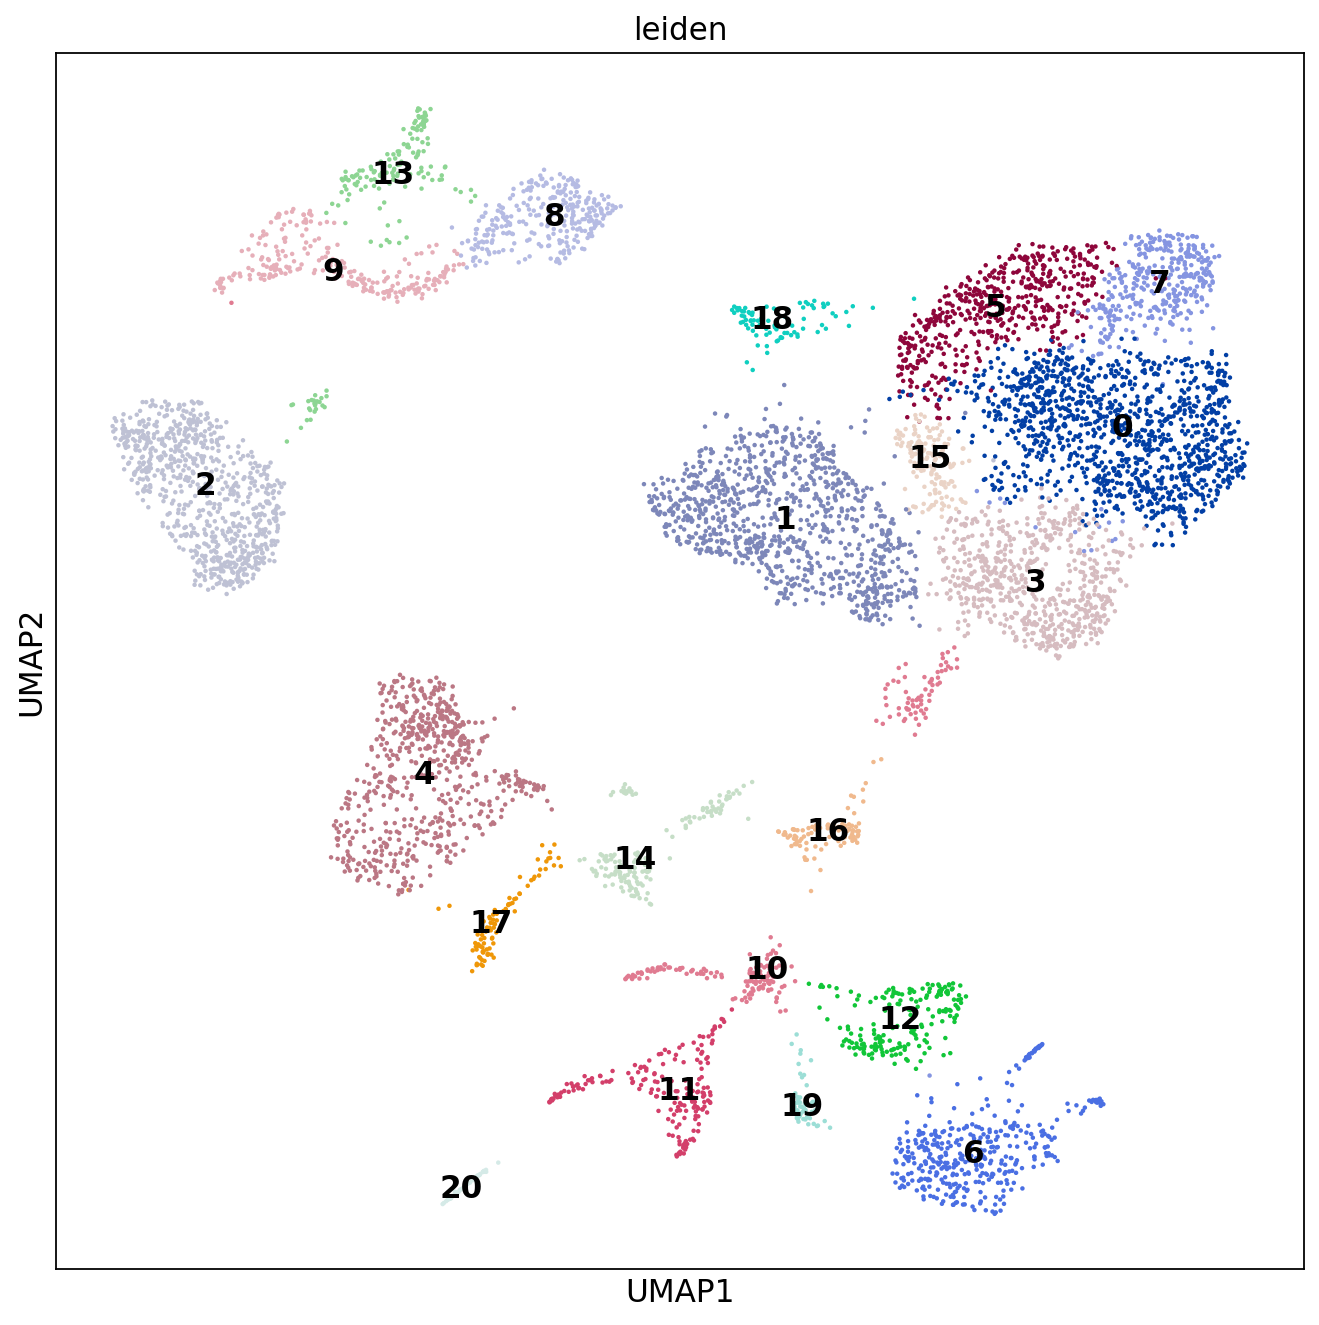

In [33]:
# lets use Leiden clustering
sc.tl.leiden(adata, resolution=0.7)
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data')



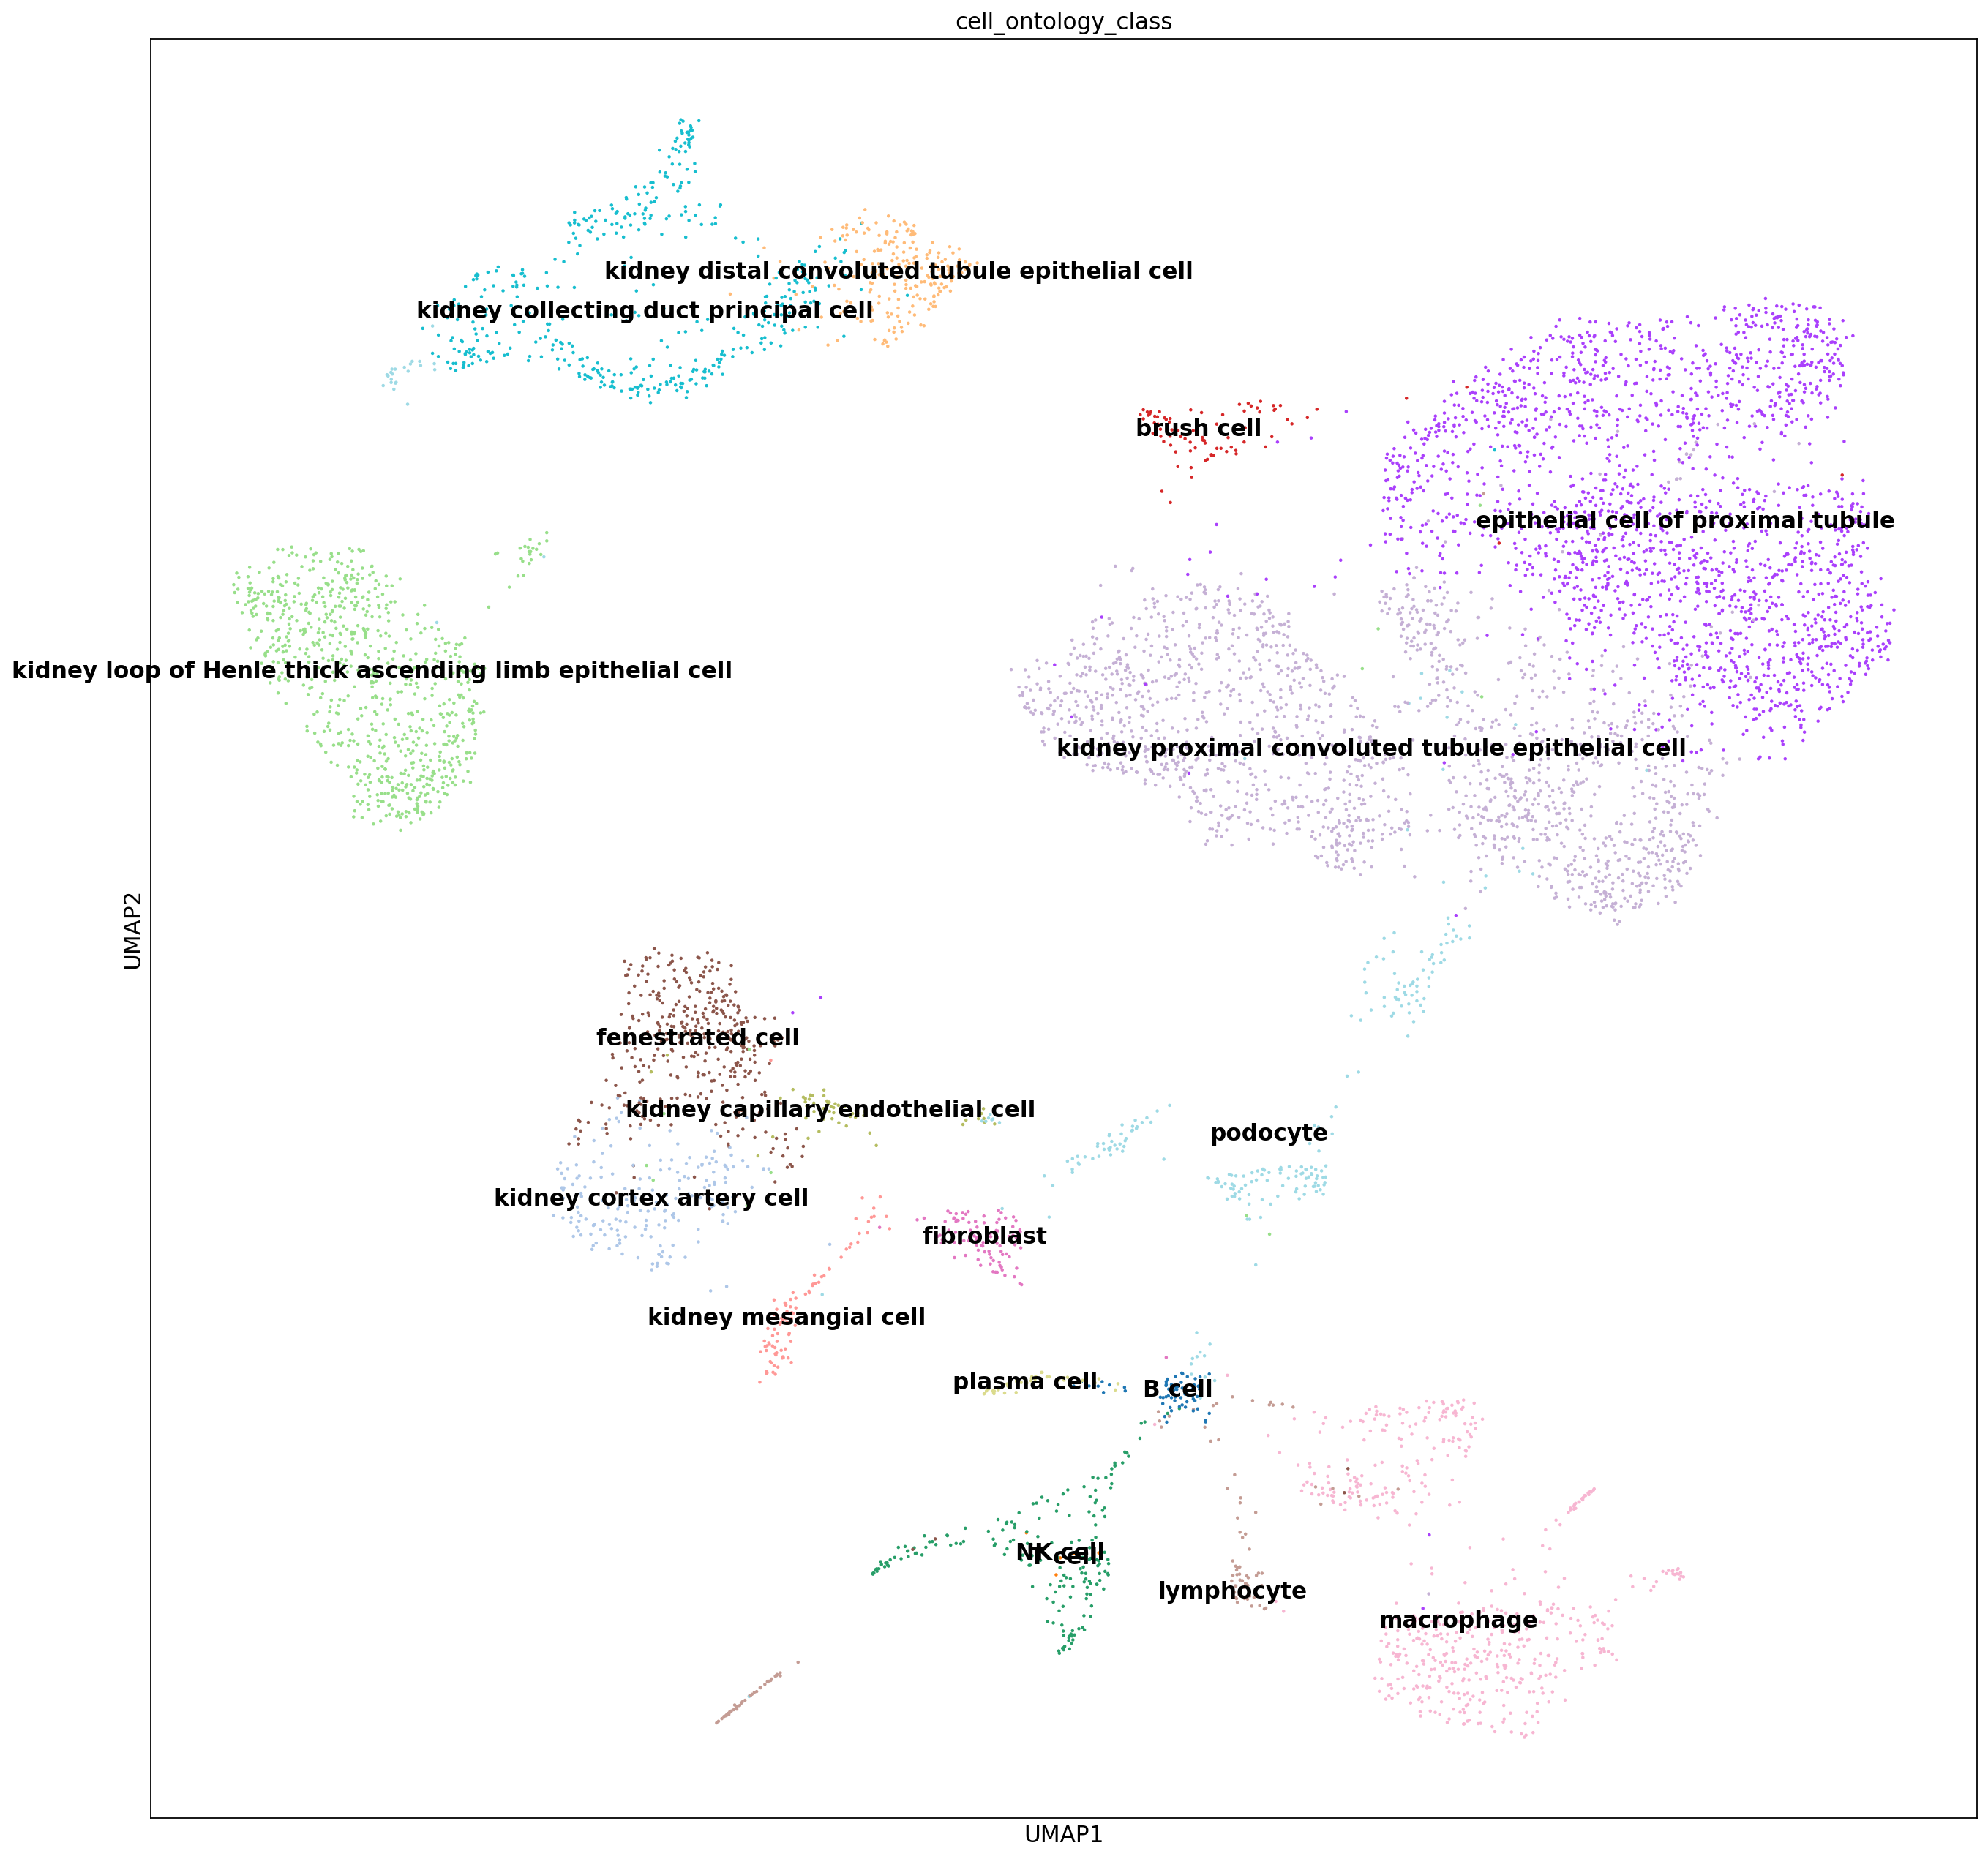

In [34]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (20, 20)}):
    sc.pl.umap(adata, color='cell_ontology_class', legend_loc='on data')


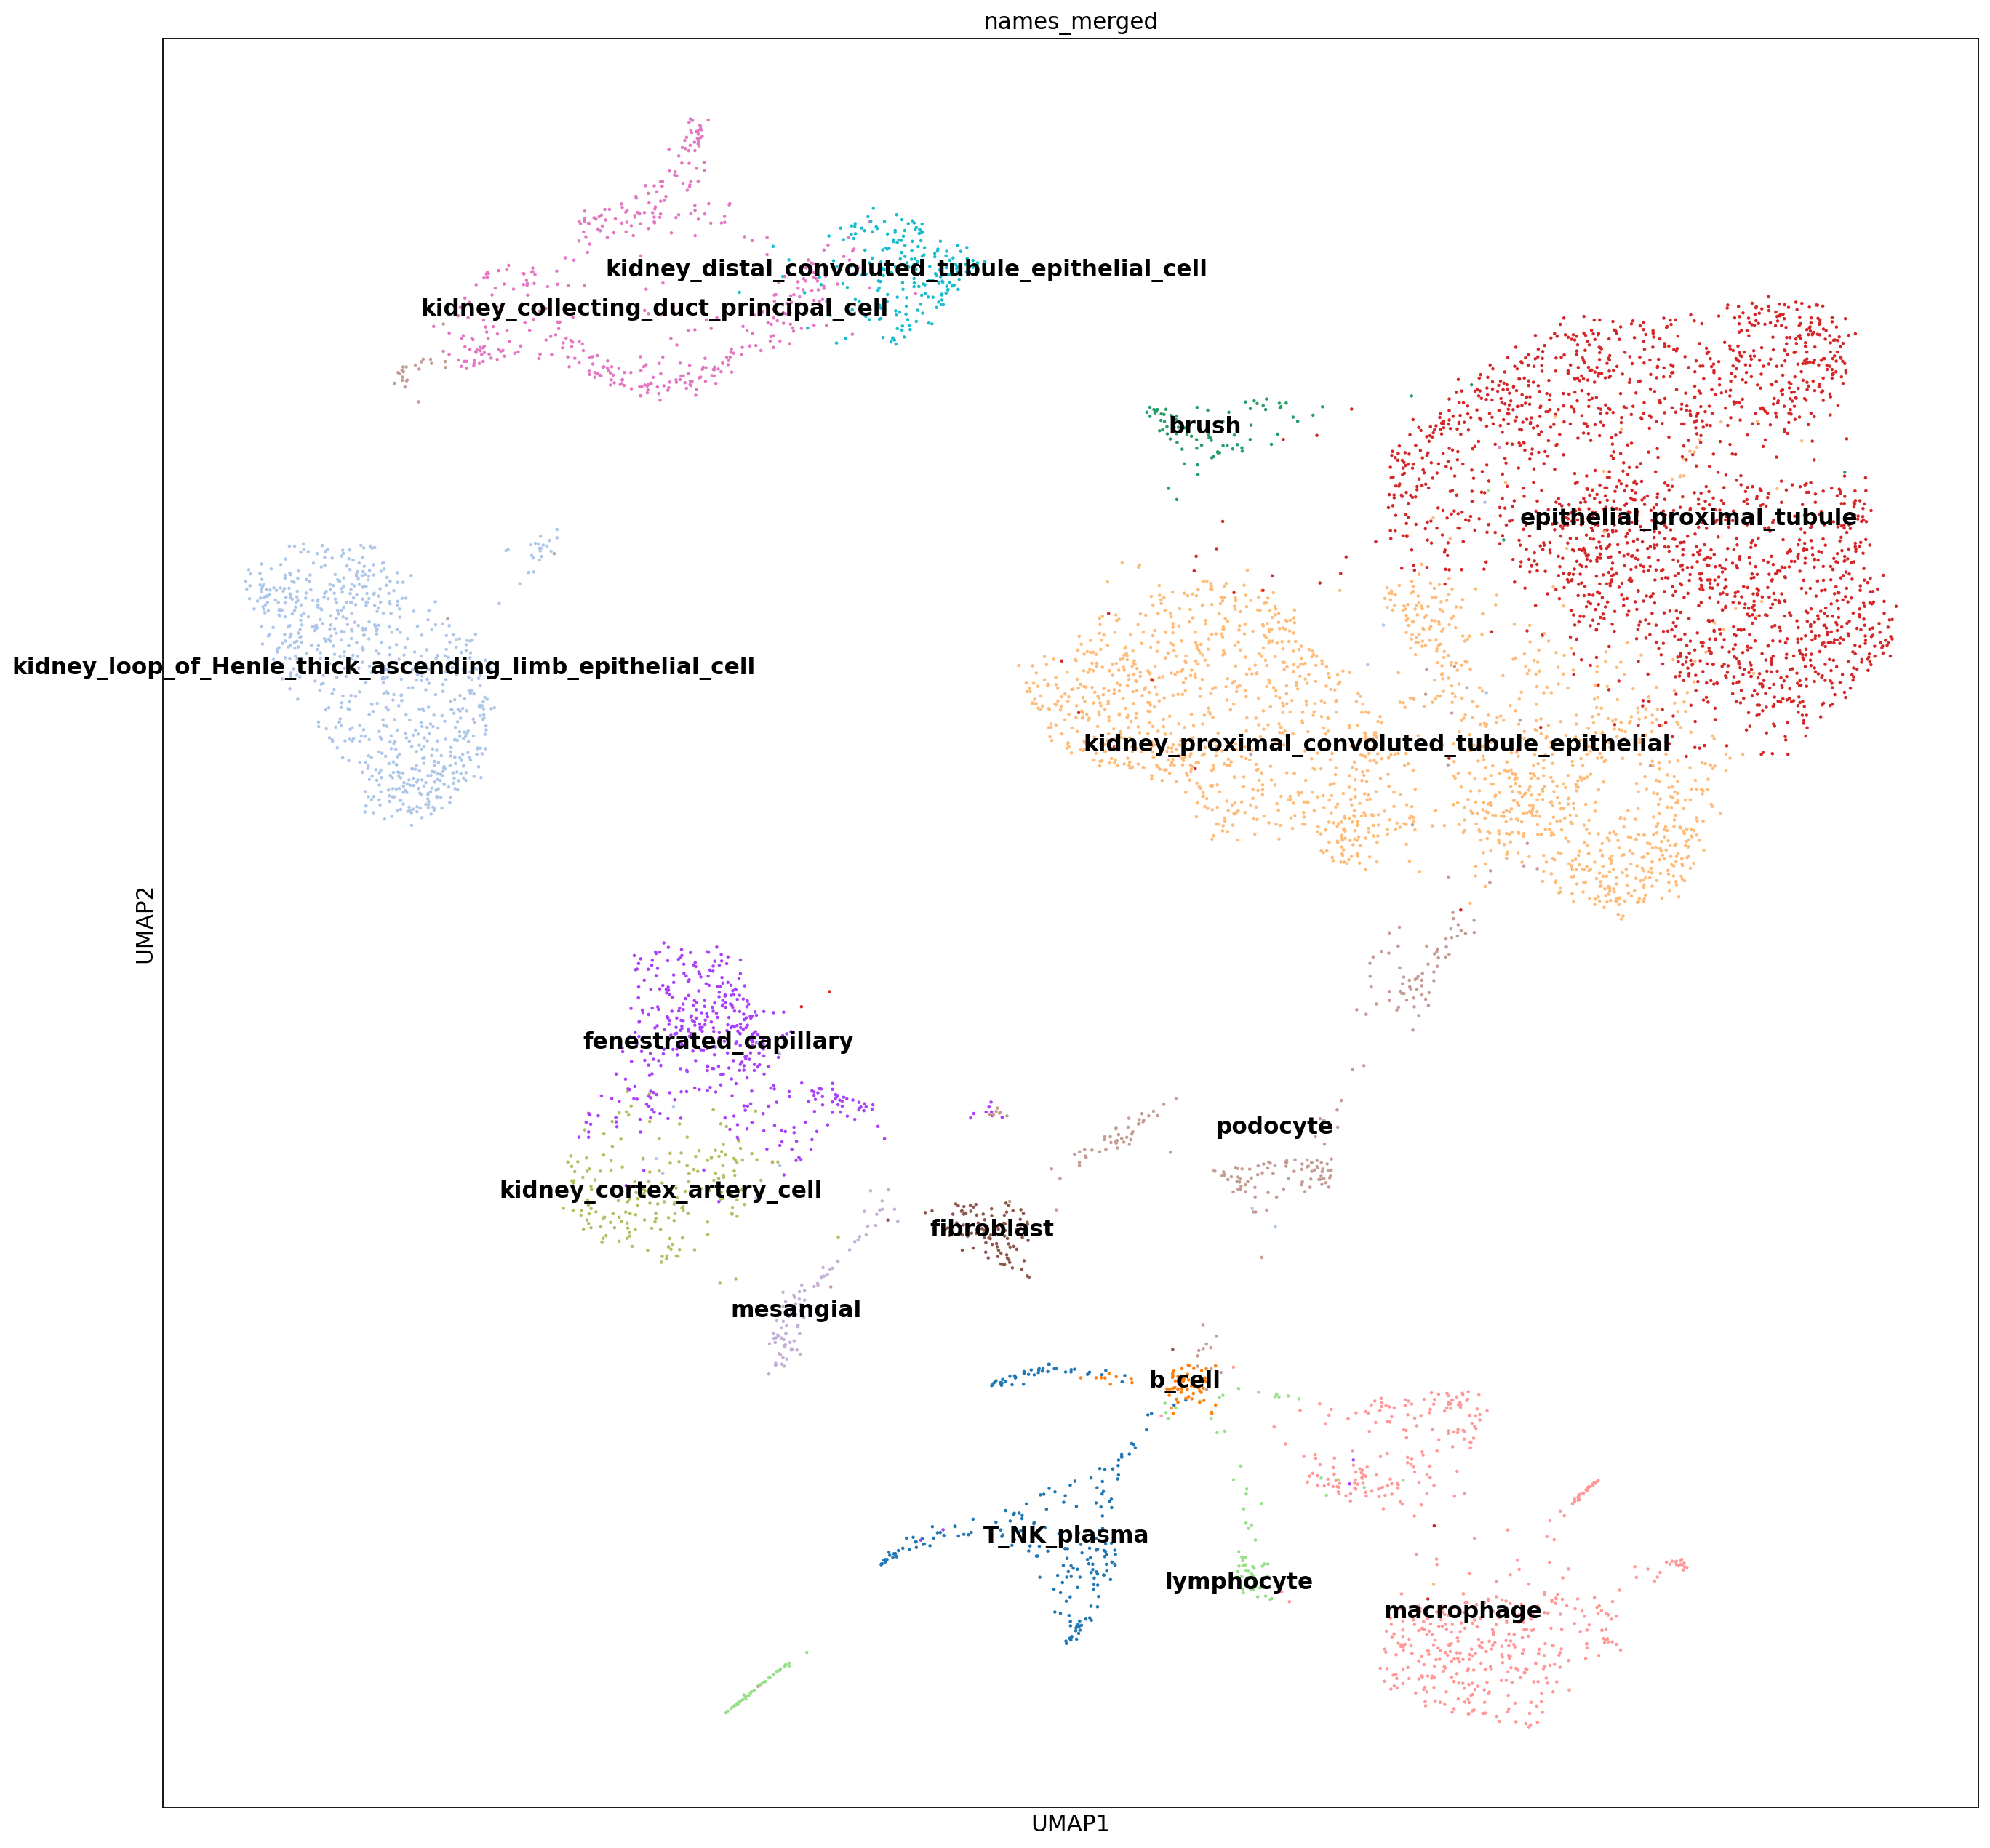

In [35]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (20, 20)}):
    sc.pl.umap(adata, color='names_merged', legend_loc='on data')


running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


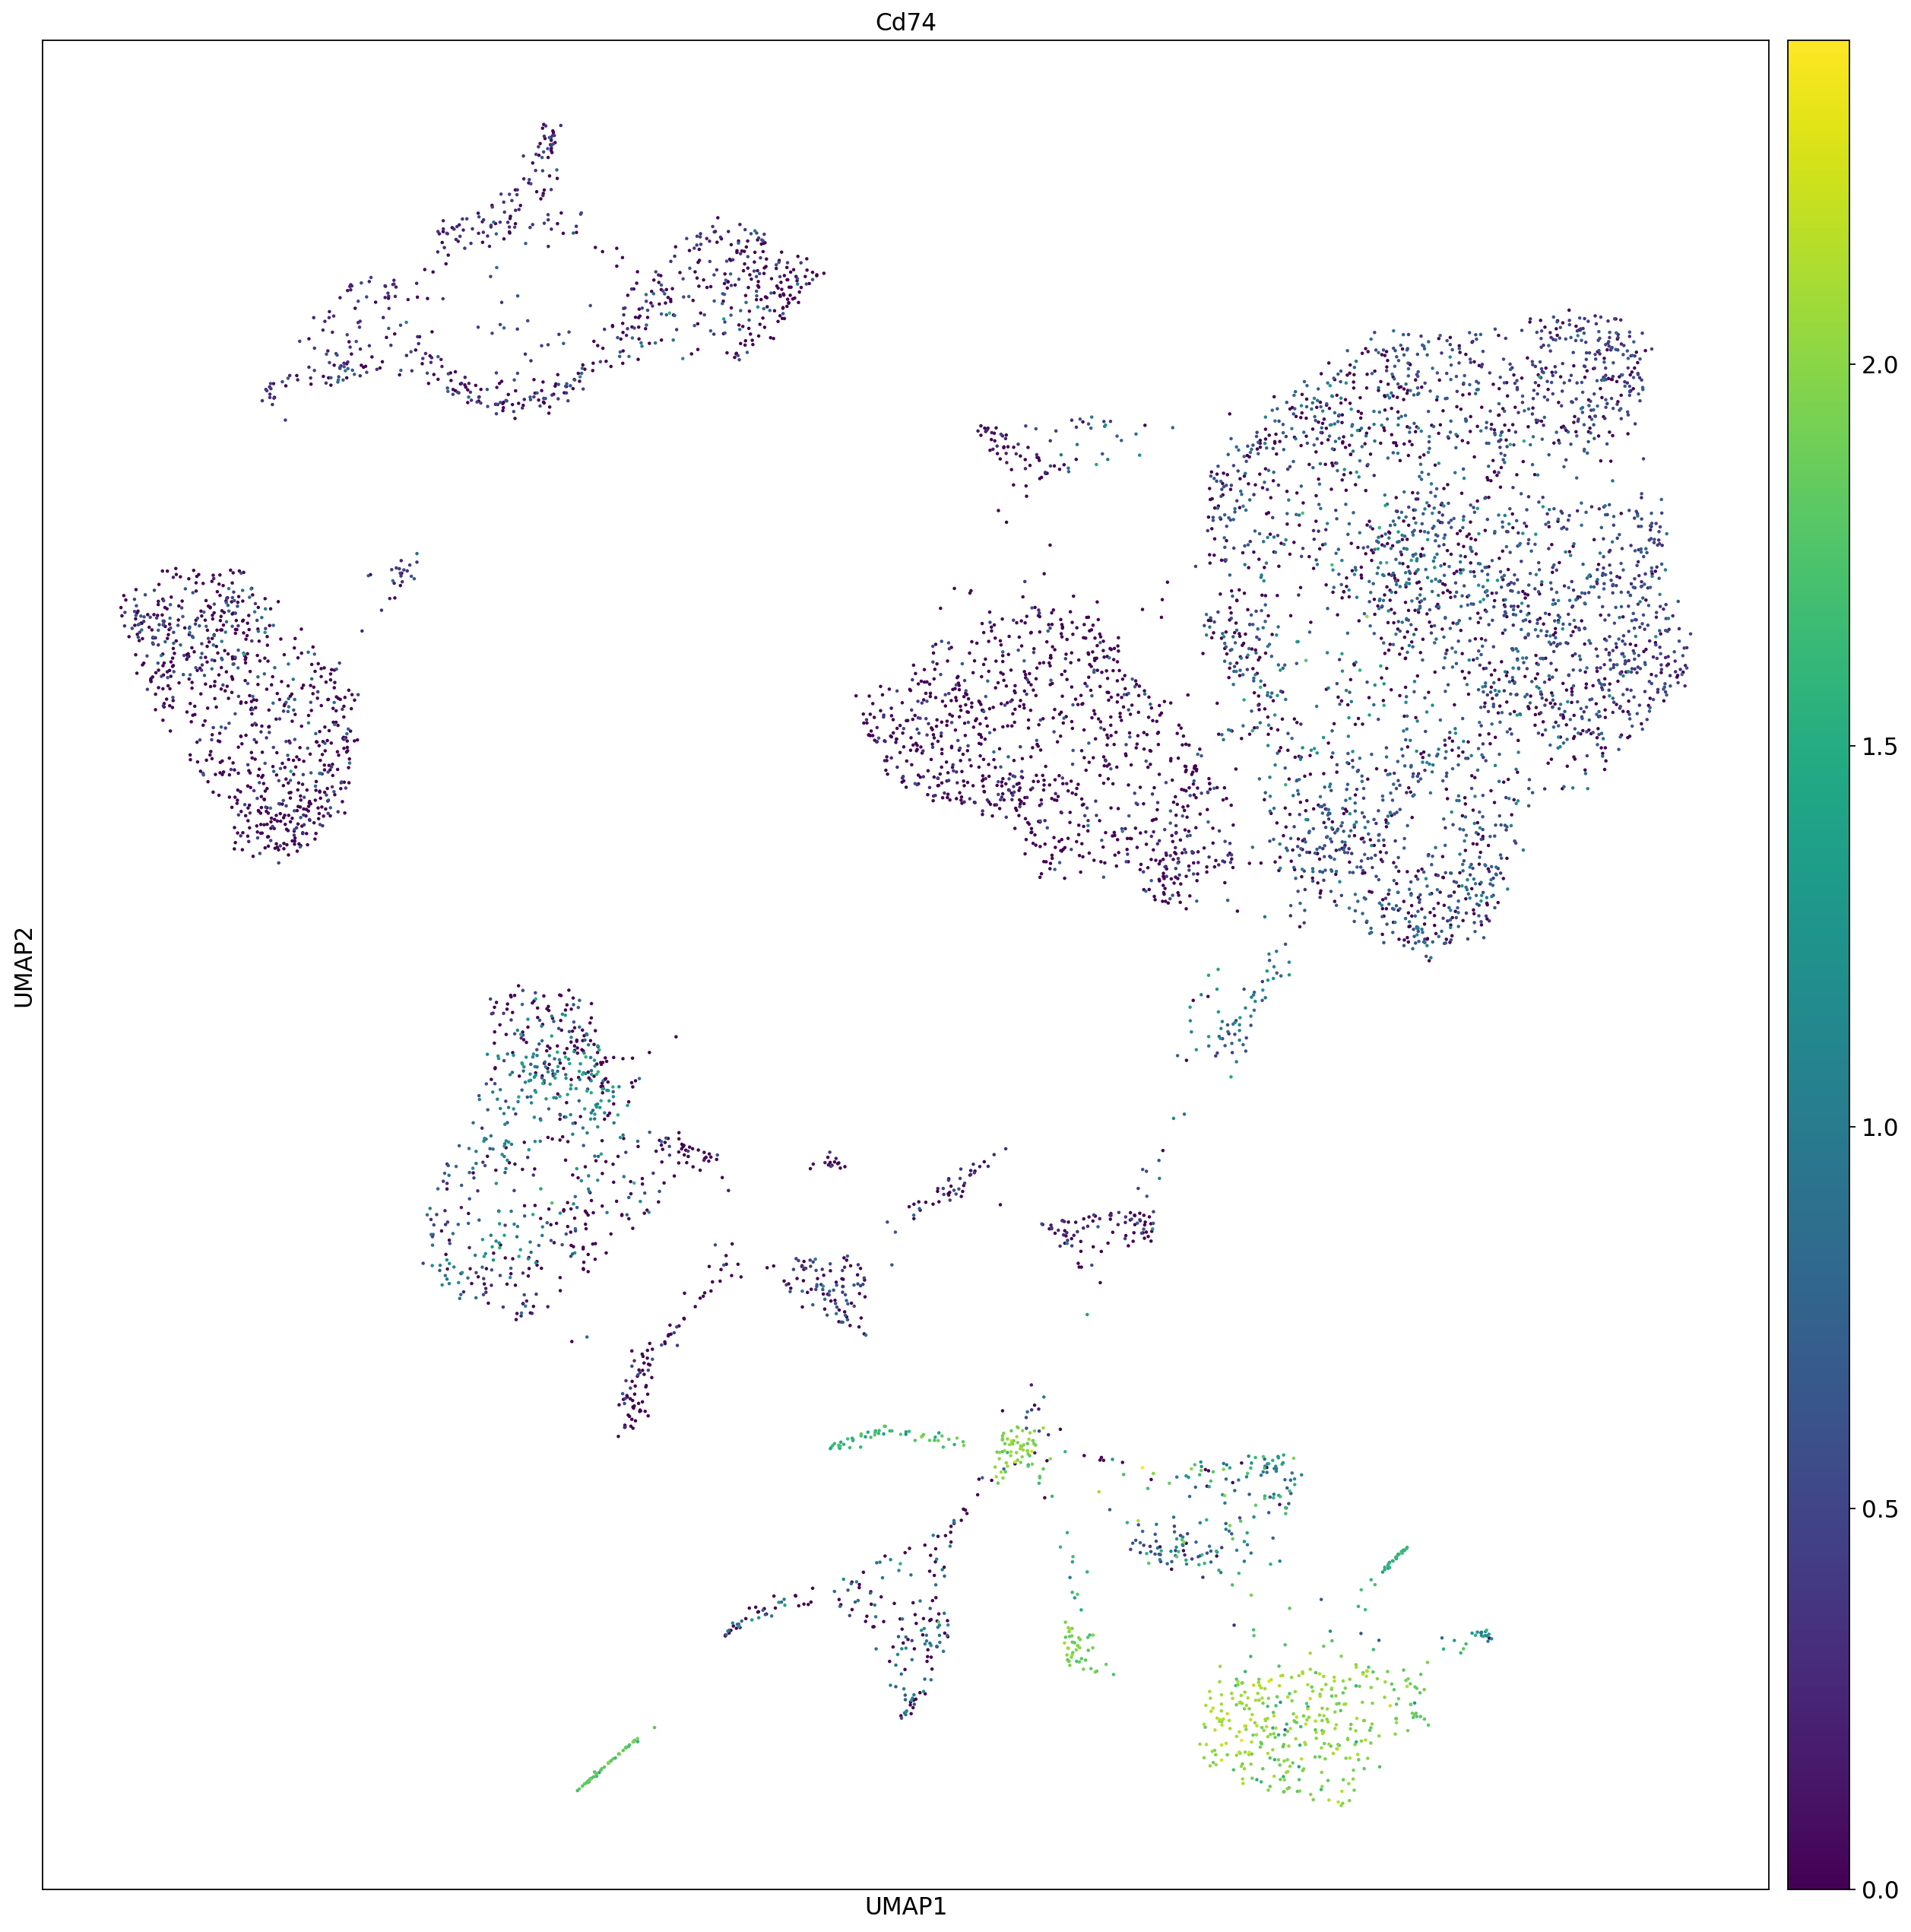

In [36]:
# lets use Leiden clustering
sc.tl.leiden(adata, resolution=0.7)
with rc_context({'figure.figsize': (20, 20)}):
    sc.pl.umap(adata, color='Cd74', legend_loc='on data')



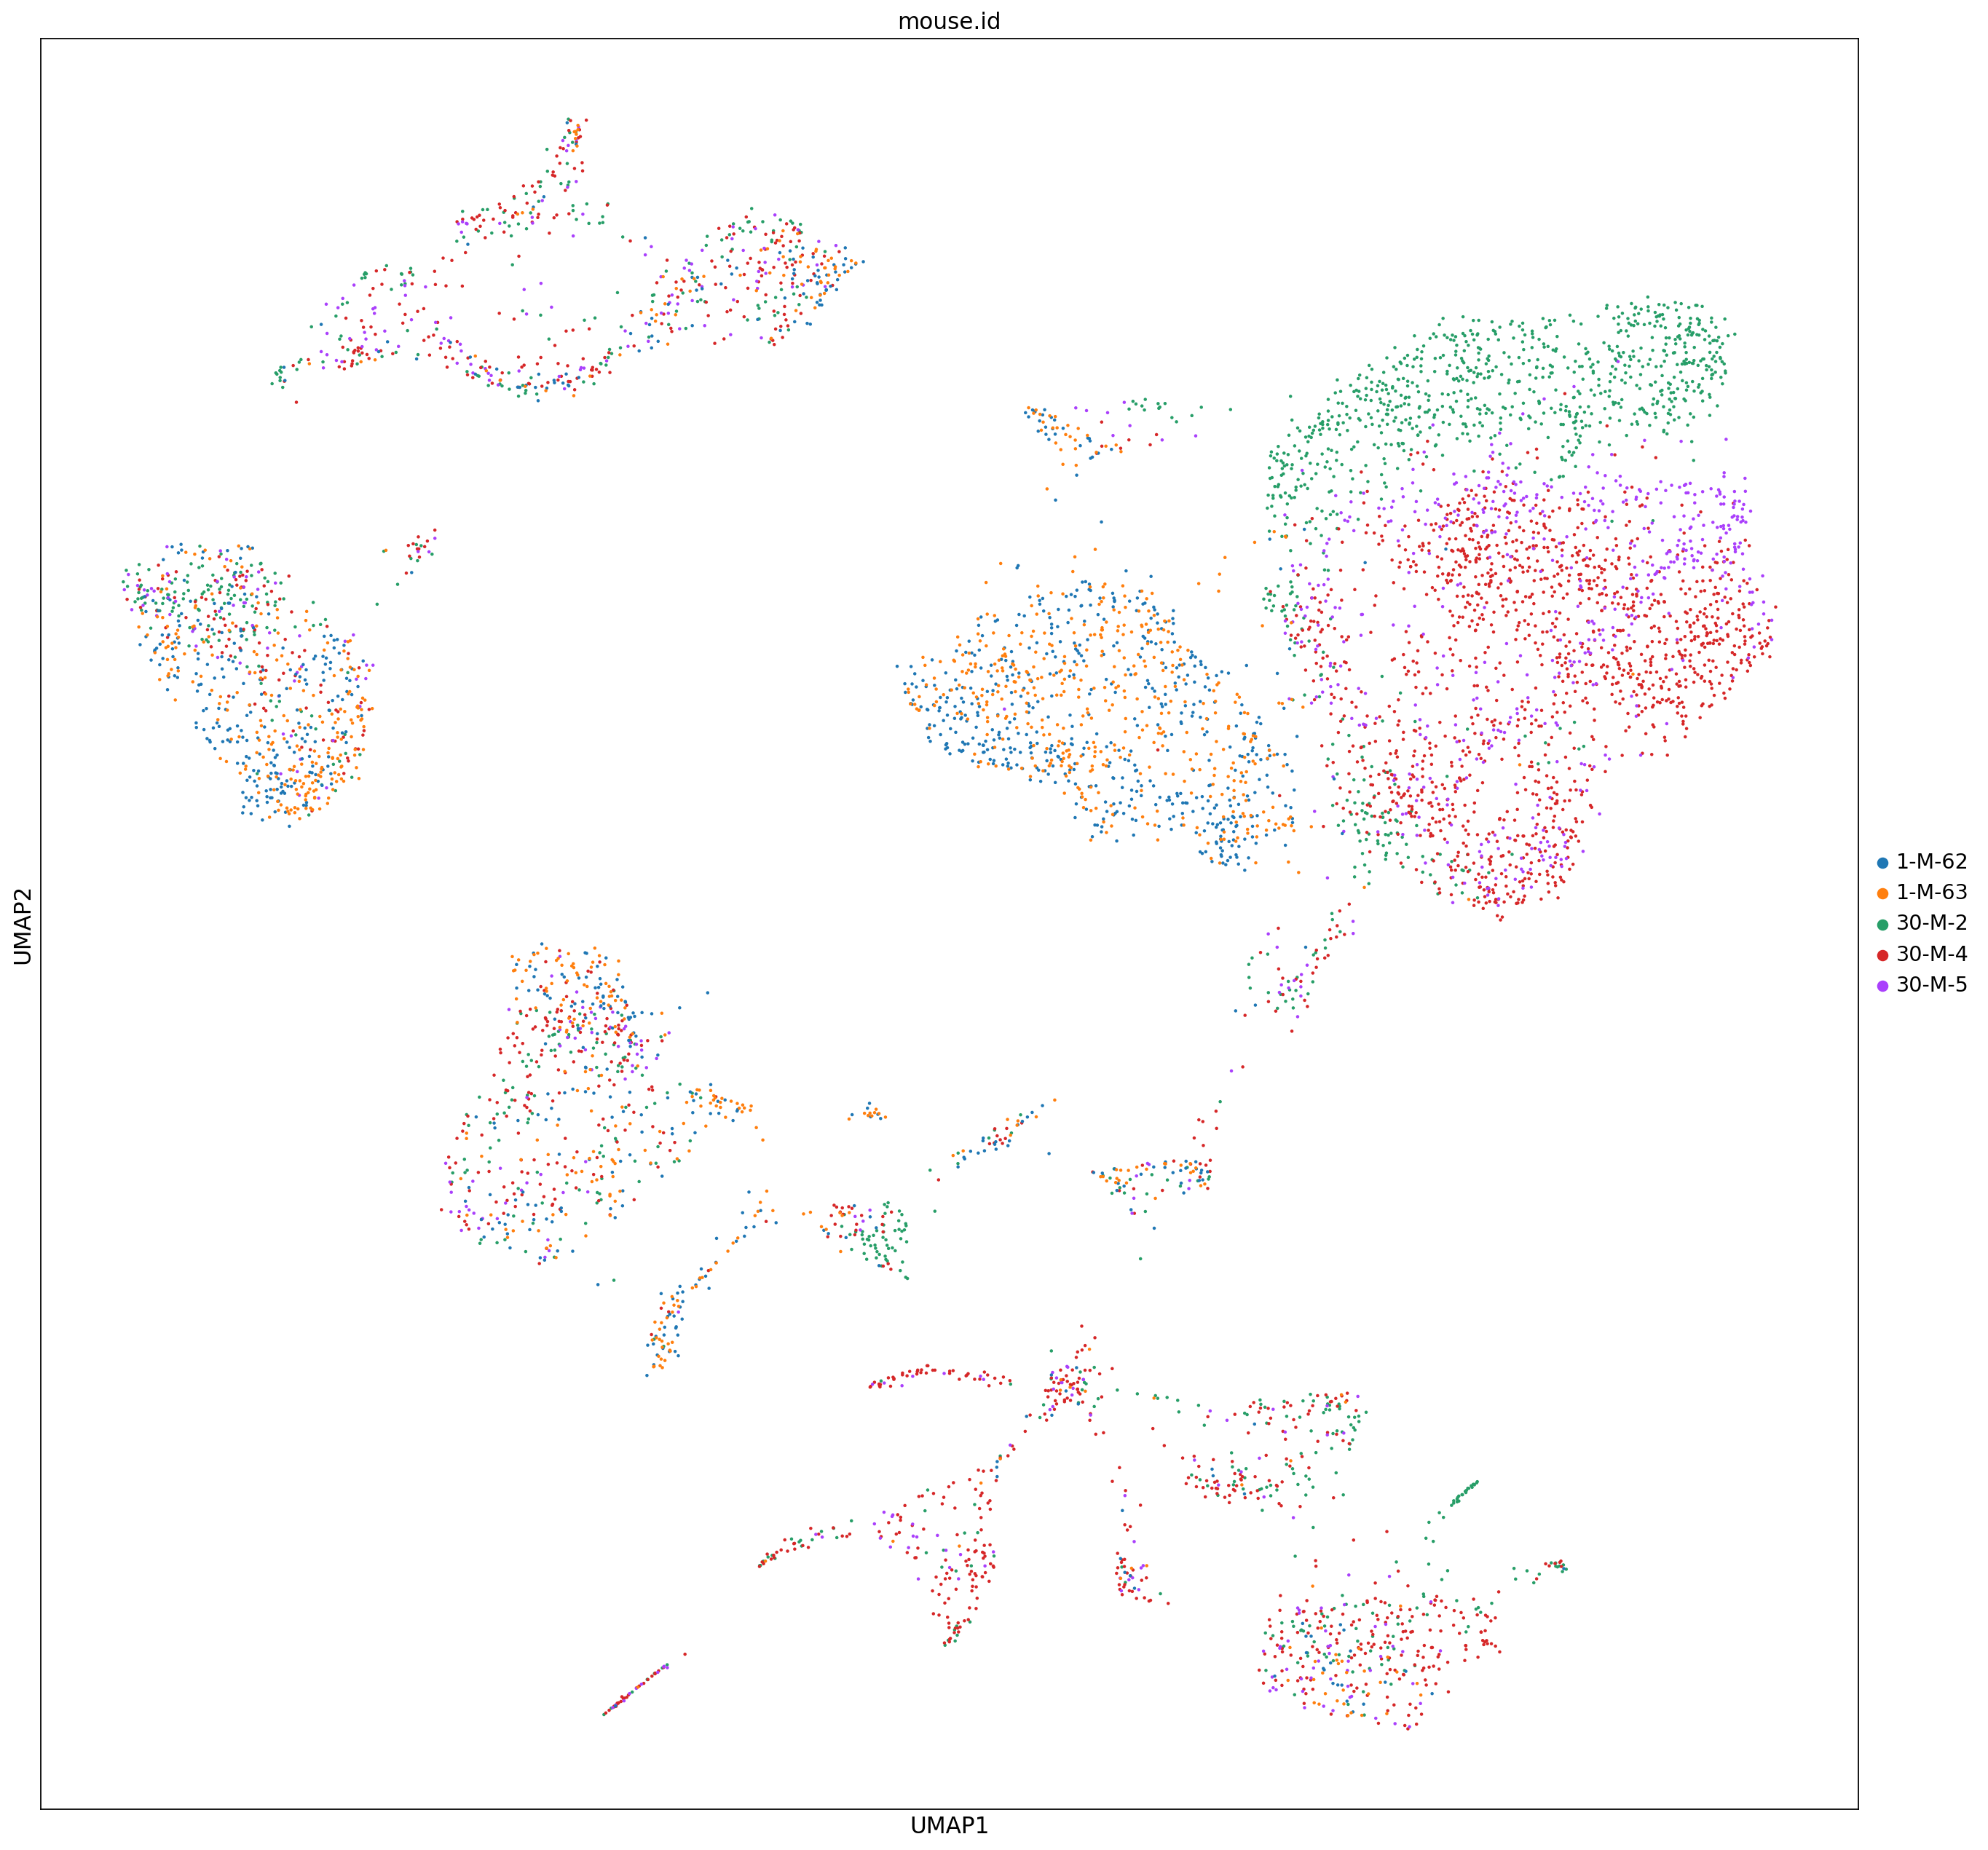

In [37]:
# plot by sample id
with rc_context({'figure.figsize': (20, 20)}):
    sc.pl.umap(adata, color='mouse.id')


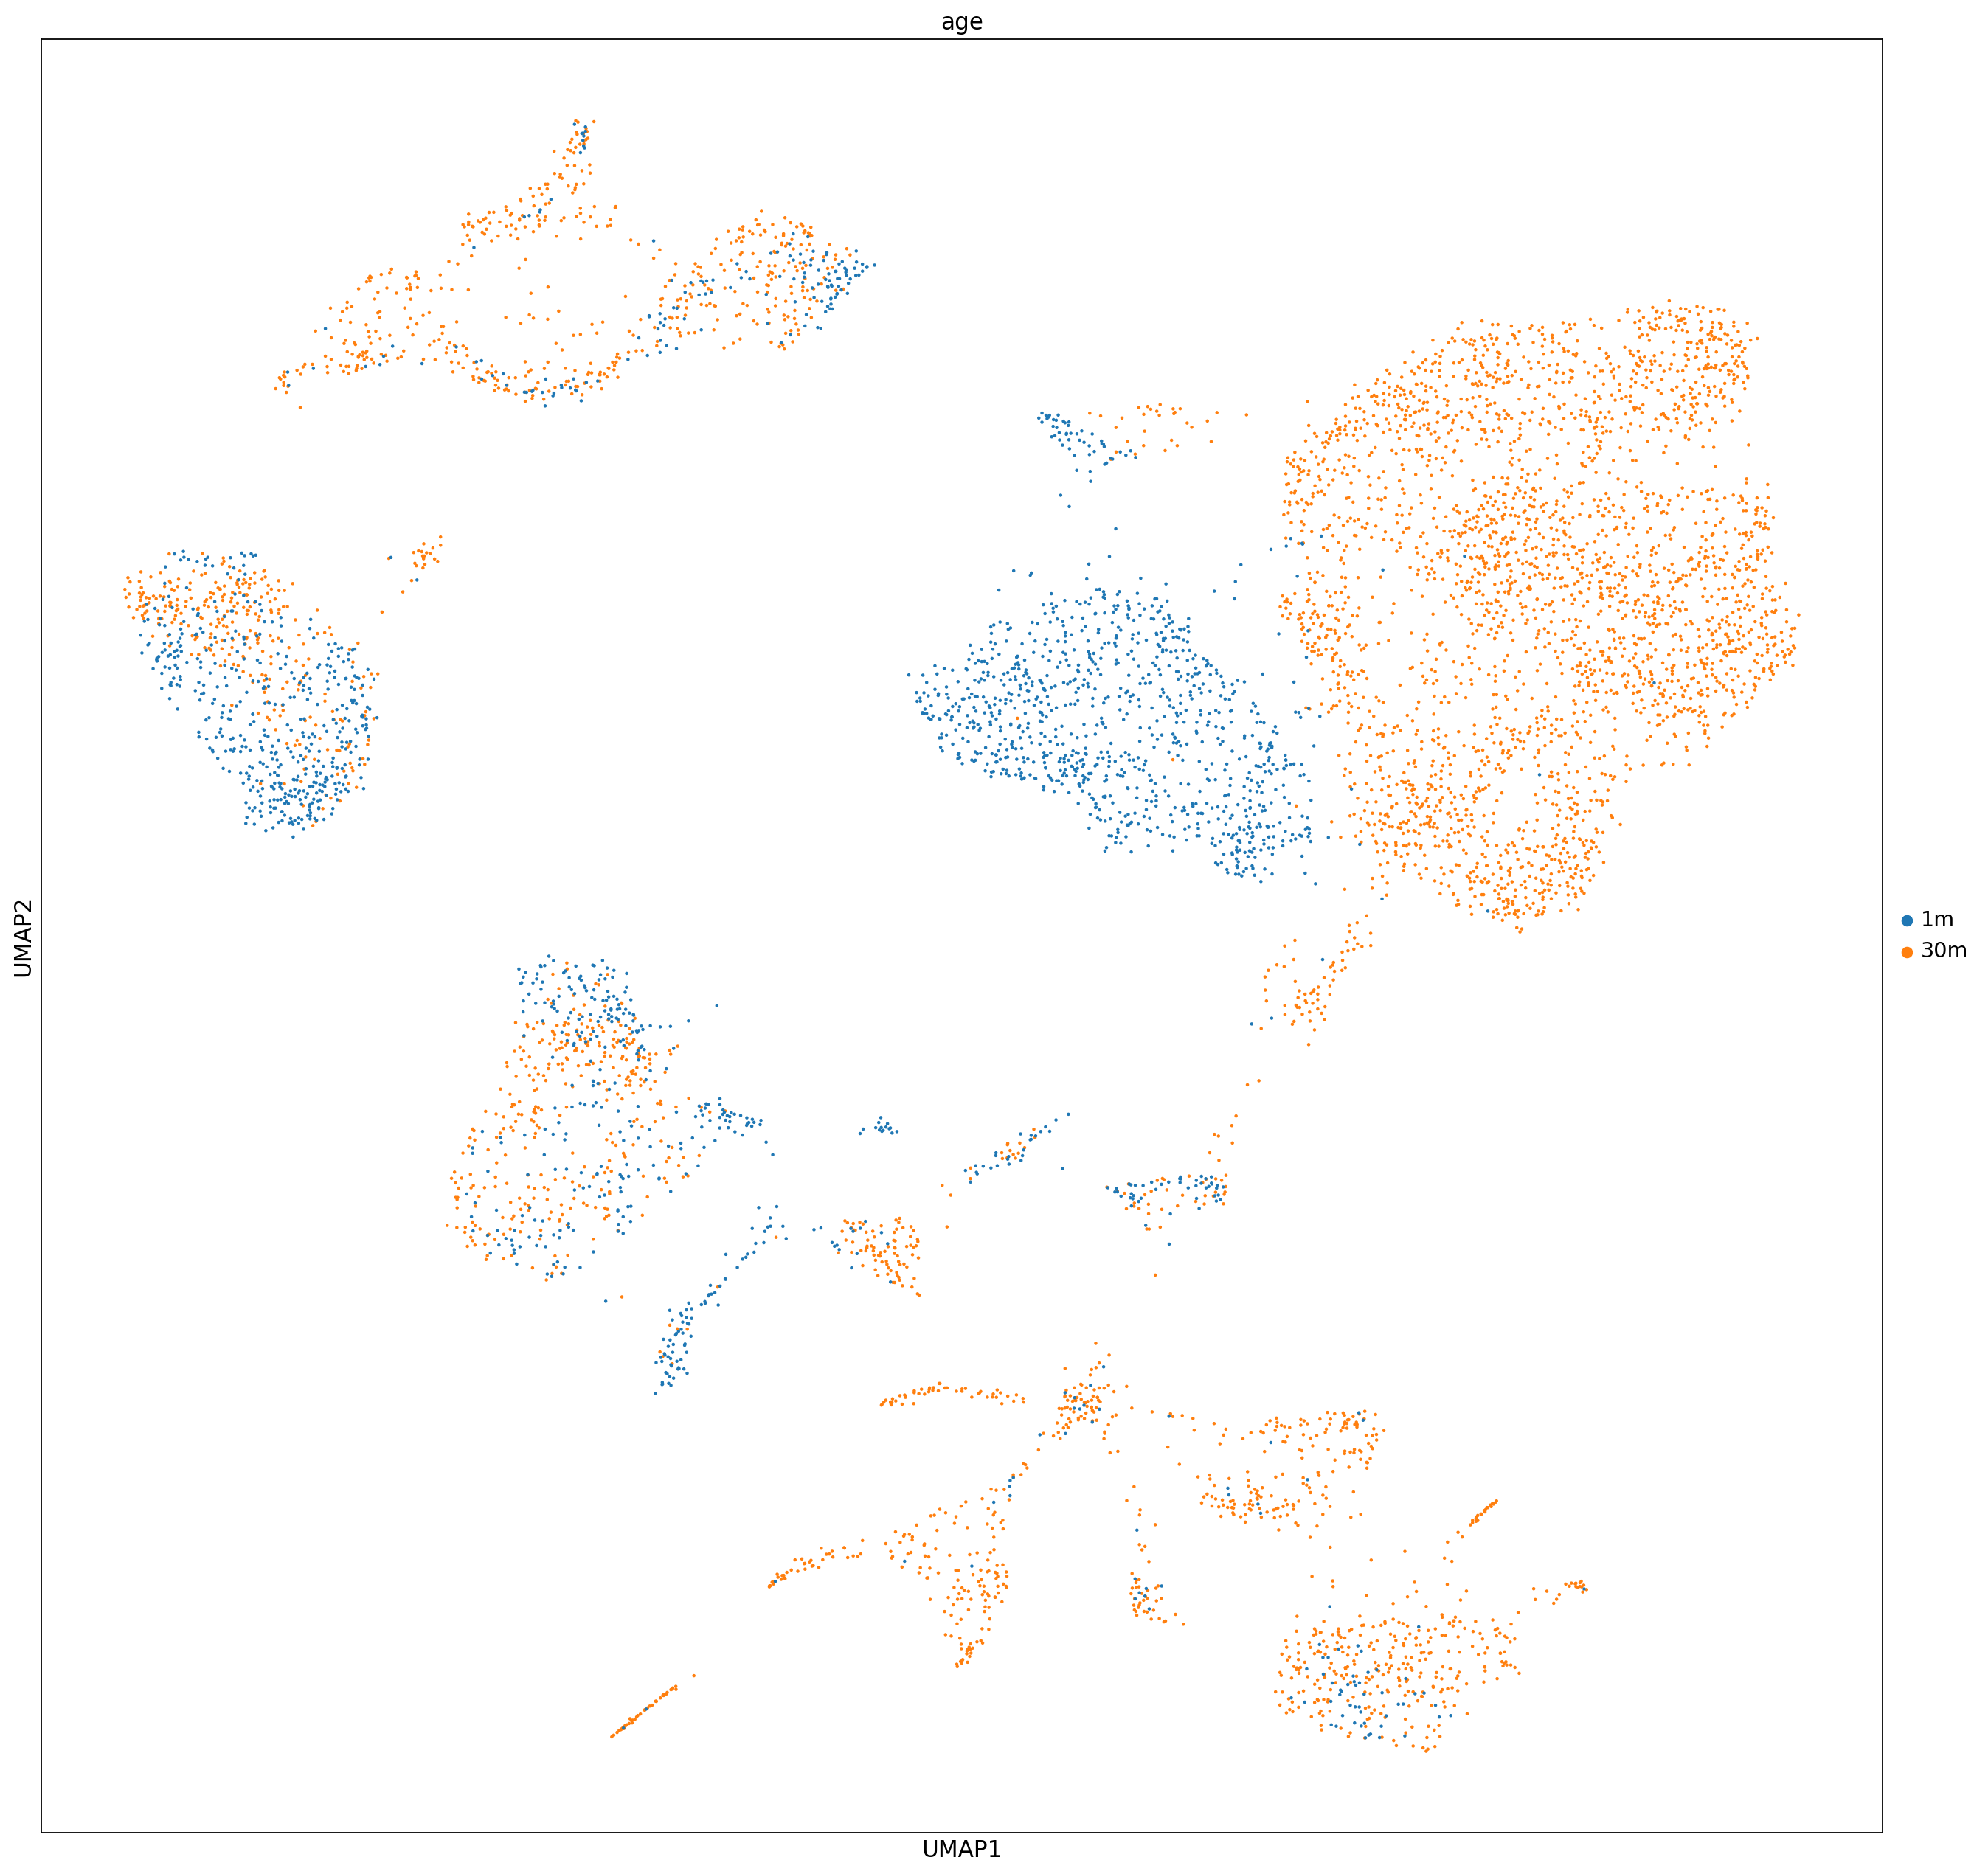

In [38]:
# plot by stimulation
with rc_context({'figure.figsize': (20, 20)}):
    sc.pl.umap(adata, color='age')
